In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/.shortcut-targets-by-id/1_r1ryXDRaCdsR0PFGkkxkbeXFIv5d38H/Project-X-Lip-Reading


In [ ]:
import pickle
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, Activation, MaxPool3D, Reshape, Bidirectional, LSTM, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy


In [ ]:
def get_cross_entropy_loss():
    return CategoricalCrossentropy()

In [ ]:
import pickle

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)

In [ ]:
model = Sequential()

model.add(Conv3D(128, 3, input_shape=(28, 100, 100, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((2,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((2,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((2,2,2)))

model.add(Reshape((75, 2*12*12)))

model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss=get_cross_entropy_loss(), optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 22, 100, 100, 128)   │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 22, 100, 100, 128)   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 11, 50, 50, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 11, 50, 50, 256)     │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 50, 50, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 5, 25, 25, 256)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 5, 25, 25, 75)       │         518,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 5, 25, 25, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 2, 12, 12, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 75, 288)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 75, 64)              │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 75, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          48,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,069 (5.96 MB)

 Trainable params: 1,562,069 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=8, callbacks=[early_stop])
t2 = time.time()
print(f"Training time : {t2 - t1} sec")

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 693ms/step - accuracy: 0.3138 - loss: 1.6141 - val_accuracy: 0.3571 - val_loss: 1.0761
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 437ms/step - accuracy: 0.2621 - loss: 1.2105 - val_accuracy: 0.3571 - val_loss: 1.0983
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.5058 - loss: 1.1311 - val_accuracy: 0.4286 - val_loss: 1.1400
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 442ms/step - accuracy: 0.3709 - loss: 1.0989 - val_accuracy: 0.5000 - val_loss: 1.0010
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 435ms/step - accuracy: 0.5290 - loss: 0.9852 - val_accuracy: 0.6429 - val_loss: 0.9266
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 438ms/step - accuracy: 0.5162 - loss: 0.9759 - val_accuracy: 0.5714 - val_loss: 0.8307
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 441ms/step - accuracy: 0.6798 - loss: 0.7986 - val_accuracy: 0.5000 - val_loss: 0.7970
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 444ms/step - accuracy: 0.6996 - loss: 0.7475 - val_accu

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9231 - loss: 0.6006
Test loss: 0.6006250977516174, Test accuracy: 0.9230769276618958


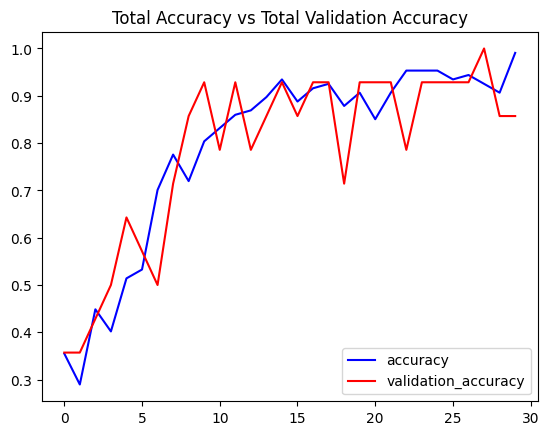

In [ ]:
plt.plot(history.history['accuracy'], 'blue', label='accuracy')
plt.plot(history.history['val_accuracy'], 'red', label='validation_accuracy')
plt.title("Total Accuracy vs Total Validation Accuracy")
plt.legend()
plt.show()


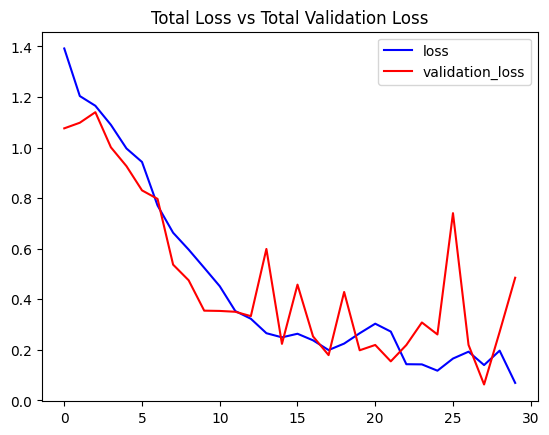

In [ ]:
plt.plot(history.history['loss'], 'blue', label='loss')
plt.plot(history.history['val_loss'], 'red', label='validation_loss')
plt.title("Total Loss vs Total Validation Loss")
plt.legend()
plt.show()